In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
import scipy.stats as stats
from scipy.stats import kurtosis
rcParams['figure.figsize'] = 12,7


In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Text(0.5, 0, 'Цена медицинской страховки')

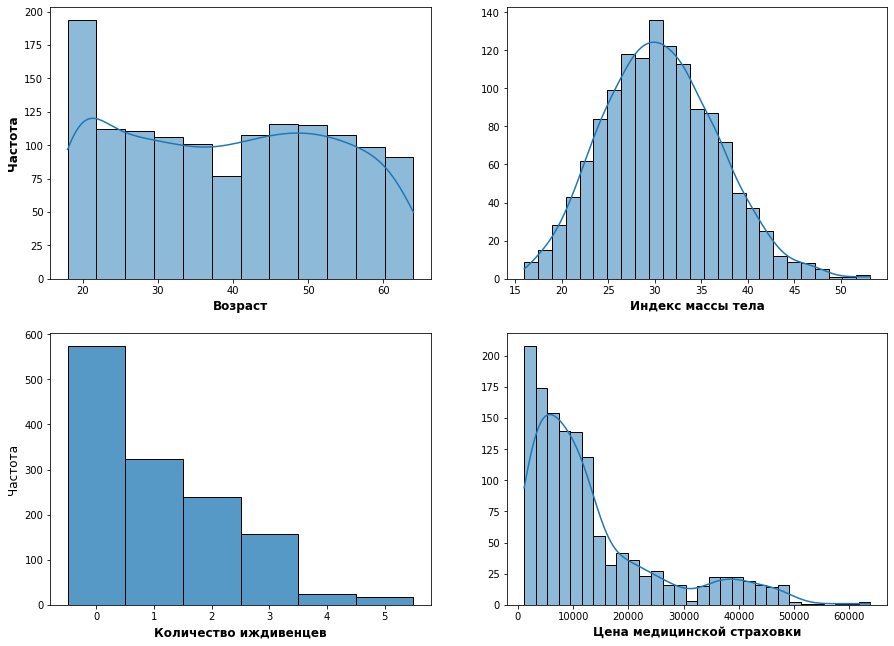

In [6]:
fig = plt.figure(figsize=(15,11))

ax1 = fig.add_subplot(221)
sns.histplot(df['age'], kde = True, bins = 'sturges')

ax1.set_ylabel('Частота', fontsize='large', fontweight='semibold')
ax1.set_xlabel('Возраст', fontsize='large', fontweight='semibold')

ax2 = fig.add_subplot(222)
sns.histplot(df['bmi'], kde = True, bins = 'fd')
ax2.set_ylabel('', fontsize='large')
ax2.set_xlabel('Индекс массы тела', fontsize='large', fontweight='semibold')

ax3 = fig.add_subplot(223)
sns.histplot(df['children'], discrete = True)
ax3.set_ylabel('Частота', fontsize='large')
ax3.set_xlabel('Количество иждивенцев', fontsize='large', fontweight='semibold')

ax4 = fig.add_subplot(224)
sns.histplot(df['charges'], kde = True, bins = 'fd')
ax4.set_ylabel('')
ax4.set_xlabel('Цена медицинской страховки', fontsize='large', fontweight='semibold')


In [7]:
def quantity(x):
    quartiles = np.quantile(x, [0.25, 0.75])
    return (quartiles[1] - quartiles[0])


def ds(i, j):
  return df[i].describe()[j]
    
table1 = pd.DataFrame({'Среднее' : [df.age.mean(), df.bmi.mean(), df.children.mean(), df.charges.mean()],
                    'Медиана': [df.age.median(), df.bmi.median(), df.children.median(), df.charges.median()],
                    'Станд. отклонение' : [ds('age', 'std'), ds('bmi', 'std'), ds('children', 'std'), ds('charges', 'std')],
                    'Межквартильный размах' : [quantity(df.age), quantity(df.bmi), quantity(df.children), quantity(df.charges)],
                    'Верхняя квартиль' : [ds('age', '75%'), ds('bmi', '75%'), ds('children', '75%'), ds('charges', '75%')],
                    'Нижняя квартиль' : [ds('age', '25%'), ds('bmi', '25%'), ds('children', '25%'), ds('charges', '25%')],
                    'Коэффициент ассиметрии' : [stats.skew(df.age),stats.skew(df.bmi), stats.skew(df.children), stats.skew(df.charges)],
                    'Коэффициент эксцесса' : [kurtosis(df.age), kurtosis(df.bmi), kurtosis(df.children), kurtosis(df.charges)],
                    'Количество наблюдений' : [ds('age', 'count'), ds('bmi', 'count'), ds('children', 'count'), ds('bmi', 'count')],
                    'Количество пропущенных значений' : [df.age.isnull().sum(), df.bmi.isnull().sum(), df.children.isnull().sum(), df.charges.isnull().sum()]},
                    index=['Возраст','ИМТ', 'Кол-во детей', 'Цена МС'])
table1

,Среднее,Медиана,Станд. отклонение,Межквартильный размах,Верхняя квартиль,Нижняя квартиль,Коэффициент ассиметрии,Коэффициент эксцесса,Количество наблюдений,Количество пропущенных значений
Возраст,39.207025,39.000,14.049960,24.000000,51.000000,27.00000,0.055610,-1.244921,1338.0,0
ИМТ,30.663397,30.400,6.098187,8.397500,34.693750,26.29625,0.283729,-0.055023,1338.0,0
Кол-во детей,1.094918,1.000,1.205493,2.000000,2.000000,0.00000,0.937328,0.197217,1338.0,0
Цена МС,13270.422265,9382.033,12110.011237,11899.625365,16639.912515,4740.28715,1.514180,1.595821,1338.0,0


In [8]:
x = df.copy()

changer = {'female': 1, 'male': 2}
x['sex'] = x['sex'].map(lambda x: changer[x])

changer = {'no': 1, 'yes': 2}
x['smoker'] = x['smoker'].map(lambda x: changer[x])

changer = {'northeast': 1, 'southwest': 2, 'northwest': 3, 'southeast': 4}
x['region'] = x['region'].map(lambda x: changer[x])

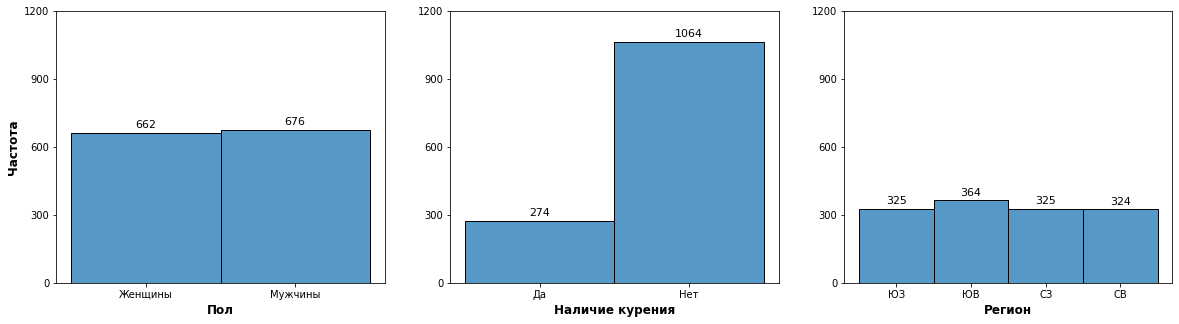

In [9]:
fig = plt.figure(figsize=(20,17))

ax1 = fig.add_subplot(331)
plot = sns.histplot(df['sex'])
for bar in plot.patches:
  plot.annotate(format(bar.get_height()),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                       ha='center', va='center', size=11, xytext=(0, 8),
                       textcoords='offset points') 
  
ax1.set_ylabel('Частота', fontsize='large', fontweight='semibold')
ax1.set_xlabel('Пол', fontsize='large', fontweight='semibold')
ax1.set_xticklabels(['Женщины', 'Мужчины'])
ax1.set_yticks([0, 300, 600, 900, 1200])

ax2 = fig.add_subplot(332)
plot = sns.histplot(df['smoker'])
for bar in plot.patches:
  plot.annotate(format(bar.get_height()),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                       ha='center', va='center', size=11, xytext=(0, 8),
                       textcoords='offset points') 


ax2.set_ylabel('', fontsize='large')
ax2.set_xlabel('Наличие курения', fontsize='large', fontweight='semibold')
ax2.set_xticklabels(['Да', 'Нет'])
ax2.set_yticks([0, 300, 600, 900, 1200])

ax3 = fig.add_subplot(333)
plot = sns.histplot(df['region'])
for bar in plot.patches:
  plot.annotate(format(bar.get_height()),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                       ha='center', va='center', size=11, xytext=(0, 8),
                       textcoords='offset points') 
ax3.set_ylabel('', fontsize='large')
ax3.set_xlabel('Регион', fontsize='large', fontweight='semibold')
ax3.set_xticklabels(['ЮЗ', 'ЮВ', 'СЗ', 'СВ'])
ax3.set_yticks([0, 300, 600, 900, 1200])


In [10]:
# Тест Шапиро-Уилка
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

data = df['bmi']

stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.994, p=0.000
Sample does not look Gaussian (reject H0)


In [11]:
df[df['bmi'] > 48.957958].charges.count() + df[df['bmi'] < 12.368836].charges.count()

4

In [12]:
df[df['charges'] > 49600.455976].charges.count()

7